# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Ex 3.1: Load the dataset from the defined data_path and display the first 5 rows.

data_path = "../data/cities_temperatures.csv"

temps_df = pd.read_csv(data_path, parse_dates=["Date"])  # TODO

temps_df.head()

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [ ]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it
temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

In [9]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

temps_df["AvgTemperatureCelsius"] = (temps_df["AvgTemperatureFahrenheit"] - 32) * 5/9  # TODO: uncomment this line to complete it

temps_df.head()

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year,AvgTemperatureCelsius
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000,26.388889
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000,26.000000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000,23.500000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000,26.111111
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000,25.055556


In [10]:
# Ex 3.3: How many different cities are there? Provide a list of them.

unique_countries_list = temps_df["City"].unique().tolist()  # TODO: this should be a list of unique countries

unique_countries_list  # TODO: print a message with the number of unique countries and the list of them

['Buenos Aires',
 'Canberra',
 'Bogota',
 'Cairo',
 'Munich',
 'Calcutta',
 'Tokyo',
 'Dakar',
 'Capetown',
 'Washington']

In [14]:
# Ex 3.4: What are the minimum and maximum dates?

min_date = temps_df["Date"].min()  # TODO
max_date = temps_df["Date"].max()  # TODO

# TODO: print a message with the min and max dates

print("Minimum Data is "+ str(min_date))
print("Maximum Data is "+ str(max_date))

Minimum Data is 2000-01-01 00:00:00
Maximum Data is 2019-12-31 00:00:00


In [19]:
# Find the minimum and maximum temperatures
min_temp = temps_df["AvgTemperatureCelsius"].min()
max_temp = temps_df["AvgTemperatureCelsius"].max()

# Find the corresponding city and date for minimum temperature
min_temp_row = temps_df.loc[temps_df["AvgTemperatureCelsius"].idxmin()]
min_temp_city = min_temp_row["City"]
min_temp_date = min_temp_row["Date"]

# Find the corresponding city and date for maximum temperature
max_temp_row = temps_df.loc[temps_df["AvgTemperatureCelsius"].idxmax()]
max_temp_city = max_temp_row["City"]
max_temp_date = max_temp_row["Date"]

# Display the results
print(f"Minimum Temperature: {min_temp}°C")
print(f"City with Minimum Temperature: {min_temp_city}")
print(f"Date with Minimum Temperature: {min_temp_date}")

print(f"\nMaximum Temperature: {max_temp}°C")
print(f"City with Maximum Temperature: {max_temp_city}")
print(f"Date with Maximum Temperature: {max_temp_date}")


Minimum Temperature: -16.77777777777778°C
City with Minimum Temperature: Munich
Date with Minimum Temperature: 2000-01-25 00:00:00

Maximum Temperature: 37.888888888888886°C
City with Maximum Temperature: Cairo
Date with Maximum Temperature: 2019-05-23 00:00:00


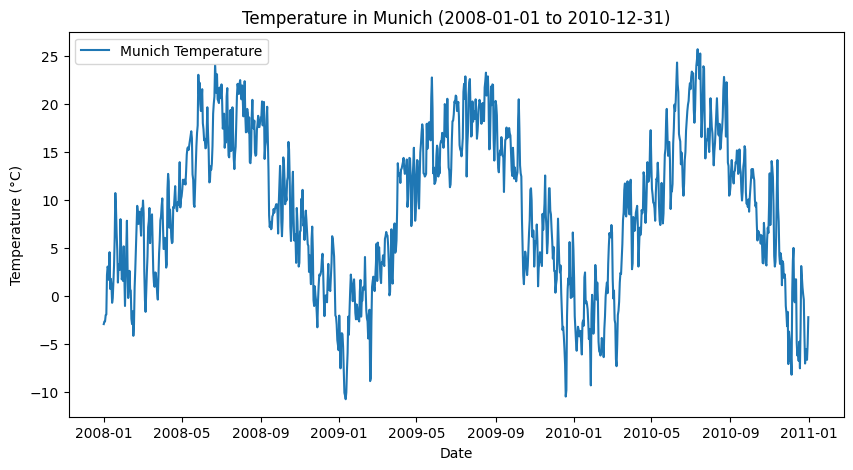

In [22]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

# Filter the dataframe for the selected city and time period
city = "Munich"
start_date = pd.to_datetime("2008-01-01")
end_date = pd.to_datetime("2010-12-31")

city_df = temps_df[temps_df["City"] == city]
city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]

# Plotting the line plot
plt.figure(figsize=(10, 5))
plt.plot(city_df_period["Date"], city_df_period["AvgTemperatureCelsius"], label=f"{city} Temperature")
plt.title(f"Temperature in {city} ({start_date.date()} to {end_date.date()})")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()




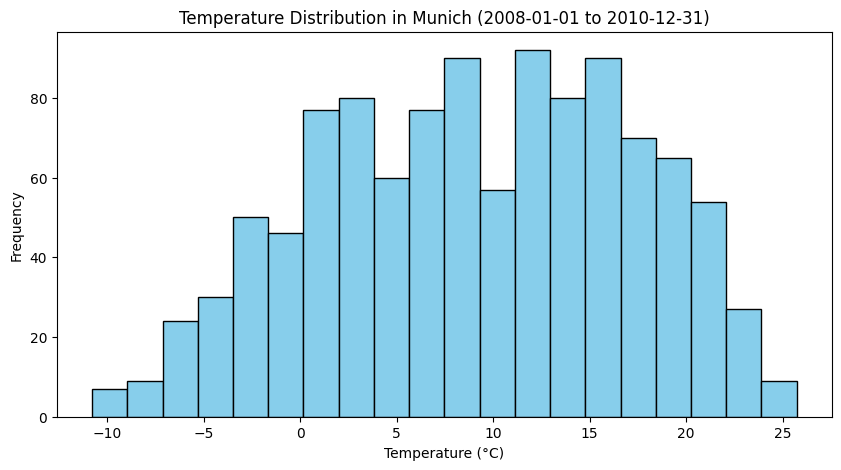

In [23]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot

# Plotting the histogram
plt.figure(figsize=(10, 5))
plt.hist(city_df_period["AvgTemperatureCelsius"], bins=20, color='skyblue', edgecolor='black')
plt.title(f"Temperature Distribution in {city} ({start_date.date()} to {end_date.date()})")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

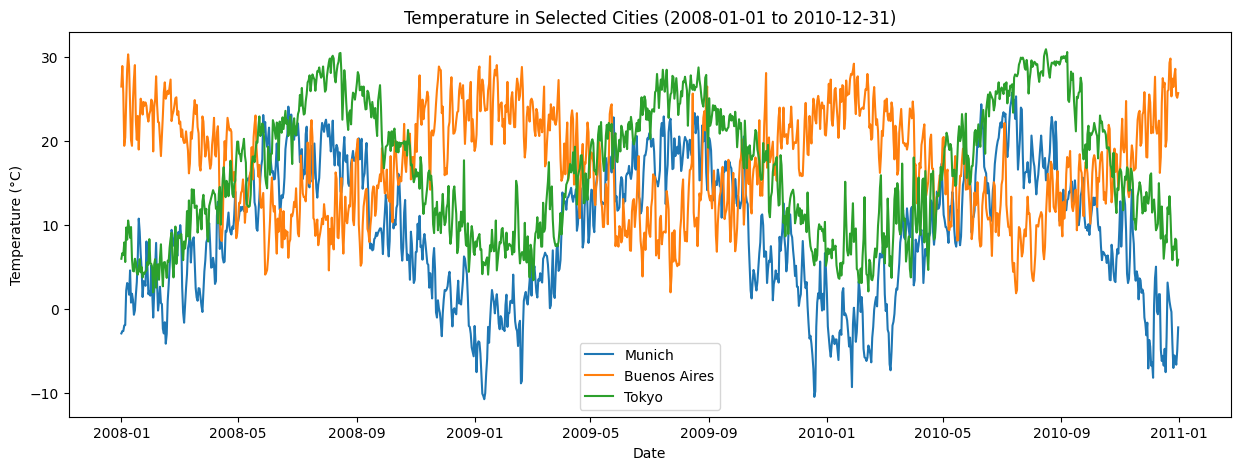

In [25]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01")
end_date = pd.to_datetime("2010-12-31")

plt.figure(figsize=(15, 5))

for city in selected_cities:
    # Filter the dataframe for the selected city and time period
    city_df = temps_df[temps_df["City"] == city]
    city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]

    # Plotting the line plot for each city
    plt.plot(city_df_period["Date"], city_df_period["AvgTemperatureCelsius"], label=city)

# Adding titles and labels
plt.title(f"Temperature in Selected Cities ({start_date.date()} to {end_date.date()})")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()




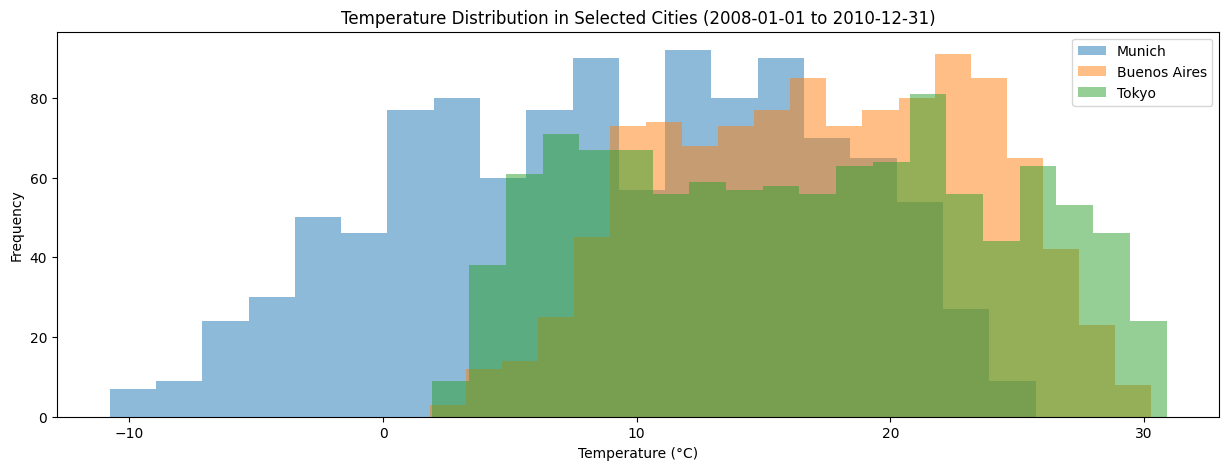

In [26]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one

# Plotting histograms for each city
plt.figure(figsize=(15, 5))
for city in selected_cities:
    # Filter the dataframe for the selected city and time period
    city_df = temps_df[temps_df["City"] == city]
    city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]

    # Plotting the histogram for each city
    plt.hist(city_df_period["AvgTemperatureCelsius"], bins=20, alpha=0.5, label=city)

# Adding titles and labels
plt.title(f"Temperature Distribution in Selected Cities ({start_date.date()} to {end_date.date()})")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.show()